\author{Johan S. Pedersen, 202107518 \and Christian Petersen, 202104742}
\maketitle
\appendix

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl

# Variables to adjust grid size
gridWidth = 10
gridHeight = gridWidth*1.26

# Resuable functions and variables

# Plots the given x- and y-coordinates
def plot(x,y):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    ax.set_aspect('equal')
    plt.grid()
    ax.plot(x,y)

# Plots the given matrix, if it is in the shape of (2,m) or (n,2)
def plotM(z):
    if (z.shape[1] == 2):
        plot(z[:, 0], z[:, 1])
    elif (z.shape[0] == 2):
        plot(z[0], z[1])
    else:
        print("Matrix does not meet requirements of shape (2, m) or (n, 2)")

# Plots multiple figures in the same plot/grid. Used for comparisson between a modified, and non-modified figure. If 'withLabels' is set to true, will include labels on each plot.
# The parameter for this function should then be: (pointValuesList: [[x1, y1, label1], [x2, y2, label2], ... [x_n, y_n, label_n]], withLabels: True)
def plotMultiple(pointValuesList, withLabels = False):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    for values in pointValuesList:
        if withLabels:
            ax.plot(values[0], values[1], label=values[2])
        else:
            ax.plot(values[0], values[1])
    ax.legend()

We're given the recipe for the number 8, given by:
$$ x(t) = 3cos(t), ~ y(t)=sin(2t), ~for~ 0 \leq t \leq 2\pi$$

\section{The horizontal 8}
Firstly we want to plot it, using $n=1000$ points. Our result, a $2\times n$-matrix, we save for later use, and denote it by $A$:


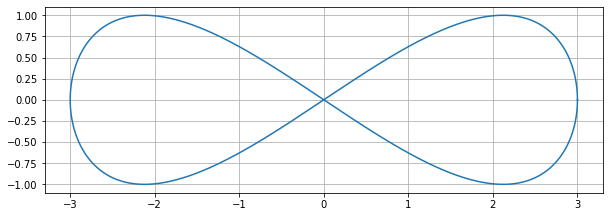

In [3]:
n = 1000

def x(t):
    return 3*np.cos(t)
def y(t):
    return np.sin(2*t)

# Transforming
x_vec = np.vectorize(x)
y_vec = np.vectorize(y)

t = np.linspace(0, 2*np.pi, n)
# x,y = inf --- y,x = 8-tal

A = np.array((x_vec(t), y_vec(t)))

# x,y = inf --- y,x = 8?
plotM(A)

\section{Random turns}
Using a uniform distribution in the interval $[\frac{\pi}{5}, \frac{4\pi}{5}]$, we want to make rotate our figure $A$, a random amount:

Theta in degrees:  [68.32091996]


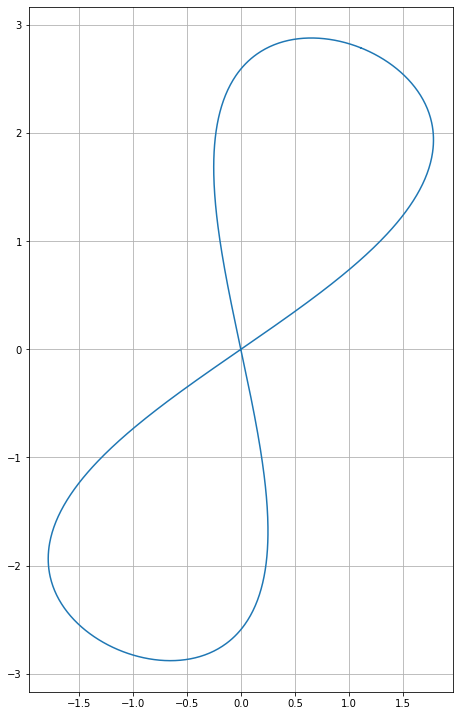

In [7]:
rng = np.random.default_rng()
theta = rng.uniform(np.pi/5, 4*np.pi/5, 1)

# Returns a rotation matrix, based on the given theta in radians
def rotationMatrix(radians): 
    c, s = np.cos(radians), np.sin(radians)
    return np.array([[c, -s], [s, c]])

# Generating our rotation matrix
rot = rotationMatrix(theta[0])

rotA = rot @ A

# For personal reasons, due to degree being more relatable. Information is not used further in the assignment
print("Theta in degrees: ", theta/(2*np.pi)*360)

# Plotting A
plotM(rotA)


\section{The distortion}
To further 'mess' up our figure, we now want to add distortion. This is done using a normal-distribution in the interval $[0,0.1]$, and construction a $2\times n$-matrix. Here we again chose $n=1000$, and add it onto our matrix A: 

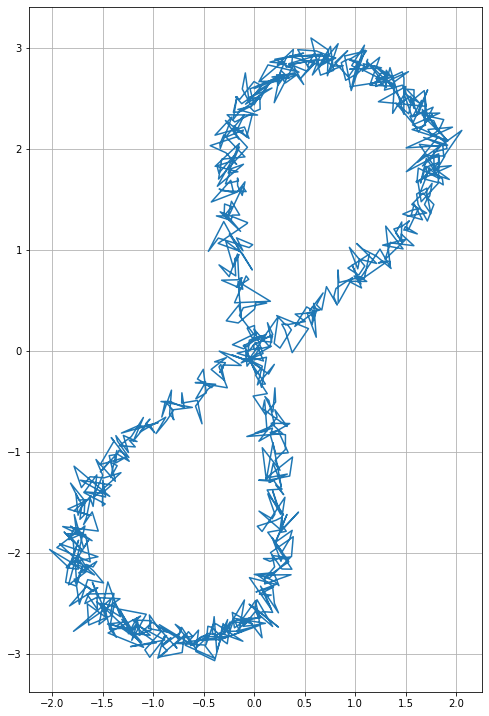

In [8]:
# Generating the distortion
distortion = rng.normal(0.0, 0.1, (2, n))

# Adding distortion onto our A-matrix
rotA_dist = np.array((rotA[0], rotA[1])) + distortion

# Plotting the matrix
plotM(rotA_dist)

\section{Reallignment}
After rotating, and distorting our figure $A$, our goal is now to transform it back to the origional horizontal number 8 (Removing the distortion is abit 'above' our paygrade, so we will focus on rotating the figure back to the origional direction, and thus undoing the operations from assignment B).
Firstly we remove the mean, of each row, from each entry in that row:

In [10]:
B = np.array((rotA_dist[0] - np.mean(rotA_dist[0]), rotA_dist[1] - np.mean(rotA_dist[1])))

This is done as a formality in this context, since our figure revolves around origo, and our mean will be very close to zero.

\section{SVD}
For our attempt to recontruct our origional figure, the use of SVD (Singular value decomposition) will have alot greater impact, than the operations just above. Here we use Python/Numpy to for the calculations. An important note is the tag 'full_matrices=False', in the function call of 'np.linalg.svd'. We will not by using the right-handside matrix $V^T$, so we can save some compute-time, by calculating a slim SVD:

In [11]:
# Calculating the slim SVD
u, s, vt = np.linalg.svd(B,full_matrices=False) 

print("U:",u)
print("S: ", s)

U: [[-0.37278943 -0.92791597]
 [-0.92791597  0.37278943]]
S:  [67.22047934 22.50934538]


\section{Relatable values}
From using our SVD-operation on our $B$-matrix, we get $U$, $S$ and $V^T$. 
For our $u$, it resembles our origional rotation matrix, with a twist. Our rotation matrix is given by:
$$ R = \begin{bmatrix} c && -s \\ s && c \end{bmatrix},$$
while our $U$ is roughly given by:
$$ U \approx \begin{bmatrix} -c && -s \\ -s && c \end{bmatrix}.$$
Our $S$ is a form of numerical representation for the shape of our B. Each entrance in the vector $S$ does not seem to relate to anything other than the other dimensions in $S$. Our $S_0 ~= 3\cdot S_1$, which makes sense, since our $x = 3cos(t)$.

In [109]:
print("Origional rotation matrix: \n", rot)
print("U:\n", u)

Origional rotation matrix: 
 [[ 0.71884312 -0.69517233]
 [ 0.69517233  0.71884312]]
U:
 [[-0.71754628 -0.69651083]
 [-0.69651083  0.71754628]]


\section{The restoration}
With our new knowledge of the resemblence between $R$ and $U$, we can use this transformation matrix, to return $B$, to something more simular, to our origional A, pre-rotation:

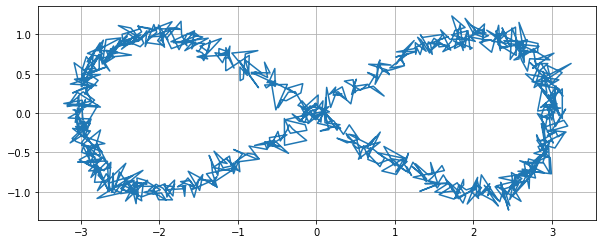

In [12]:
B_rotBack = u.T @ B 

# Plotting the matrix
plotM(B_rotBack)

\section*{Just for fun}
Due to our knowledge of the origional rotation matrix $R$, we recognized that $U$ is approximately our $R$, multiplied by a reflective matrix, reflecting the matrix in the $y$-axis, so for fun we tried to restore the figure even more:

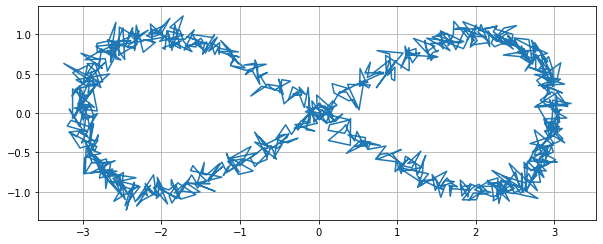

In [13]:
# Add-on: Reflection to transform B back into the origional direction of A
plotM(np.array([[-1., 0.], [0., 1.]] @ B_rotBack))